# Capstone Project-Investment and Trading 

The code in this ipython notebook is based on Machine Learning for Trading class offered by Udacity. 
This project aims to predict stock price of a portfolio that would give the maximum Sharpe ration in the given period of time that the client wants to sell. 

The input of this project is ticker symbols, start_date, and end_date. 
The intermediate output is the optimal ratio of each stock in a portfolio that is predicted to make maximum Sharpe ratio for 7 days, 1month, 3month, 6month, and 1 year. 
The ultimate output is the proposal of cumulative return for that porfolio with many different sets of optimal ratio for diffenrent investment period. 

**Step 1.** The stock price data for several ticker symbols are downloaded from Yahoo! Finance in the current working directory. User can give upto 5 ticker symbols. Start_date, end_date is user's choice. For the testing purpose, end_date should incorportate the date that train

**Step 2.** 


In [92]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [44]:
%matplotlib inline 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import urllib
import math
import datetime as dt
from datetime import datetime
from pandas import datetime
import scipy.optimize as spo
from scipy.spatial import distance
from sklearn.model_selection import TimeSeriesSplit

os.getcwd()

'/Users/parksoy/Desktop/GoogleDrive_Soyoung/Udacity_nanoDegree_MachineLearning/capstone'

# 1. Data preprocessing

# 1-1. Download features/fundamental indicators for Intel and saved as csv. 

In [7]:
df_feature=pd.read_csv('./data/INTC_feature.csv',parse_dates=True,index_col="Period",na_values=["nan"]) #, usecols=["Date", "Adj Close"]
df_feature.head(5)   

,Intel 14-Day Relative Strength Index,Intel 20-Day Simple Moving Average,Intel 30-Day Rolling Volatility,Intel Daily Value at Risk (VaR) 5% (All),Intel EBITDA (TTM),Intel EPS Basic (TTM),Intel Enterprise Value,Intel Market Cap,Intel Momentum Score,Intel Net Change in Capital Expenditures (TTM),Intel Normalized Diluted EPS (TTM),Intel Open Price (Daily),Intel PE Ratio (TTM),Intel Price,Intel Price to Book Value,Intel Quick Ratio (Quarterly),Intel Total Return Price (Forward Adjusted),Intel Volume
Period,,,,,,,,,,,,,,,,,,
2017-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170082.71,NaN,NaN,NaN,NaN,17.009462,35.89,2.568221,NaN,NaN,NaN
2017-03-08,40.5449,36.0295,13.8909,NaN,NaN,NaN,176987.18,168803.18,NaN,NaN,NaN,35.67,16.881500,35.62,2.548900,NaN,52.507029,20908071.0
2017-03-07,43.0301,36.0660,15.5712,NaN,NaN,NaN,177840.20,169656.20,NaN,NaN,NaN,35.54,16.966800,35.80,2.561800,NaN,52.772365,23423844.0
2017-03-06,38.5619,36.0895,15.4644,NaN,NaN,NaN,176750.23,168566.23,NaN,NaN,NaN,35.79,16.857800,35.57,2.545300,NaN,52.433325,24405135.0
2017-03-03,43.0615,36.1370,15.5852,NaN,NaN,NaN,178314.10,170130.10,NaN,NaN,NaN,35.94,17.014200,35.90,2.568900,NaN,52.919774,17539388.0


In [8]:
df_feature.tail(5) 

,Intel 14-Day Relative Strength Index,Intel 20-Day Simple Moving Average,Intel 30-Day Rolling Volatility,Intel Daily Value at Risk (VaR) 5% (All),Intel EBITDA (TTM),Intel EPS Basic (TTM),Intel Enterprise Value,Intel Market Cap,Intel Momentum Score,Intel Net Change in Capital Expenditures (TTM),Intel Normalized Diluted EPS (TTM),Intel Open Price (Daily),Intel PE Ratio (TTM),Intel Price,Intel Price to Book Value,Intel Quick Ratio (Quarterly),Intel Total Return Price (Forward Adjusted),Intel Volume
Period,,,,,,,,,,,,,,,,,,
1972-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079676,NaN,0.079676,NaN,NaN,0.079676,0.0
1972-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079676,NaN,0.079676,NaN,NaN,0.079676,0.0
1972-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079676,NaN,0.079676,NaN,NaN,0.079676,0.0
1972-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074065,NaN,0.074065,NaN,NaN,0.074065,0.0
1972-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074065,NaN,0.074065,NaN,NaN,0.074065,0.0


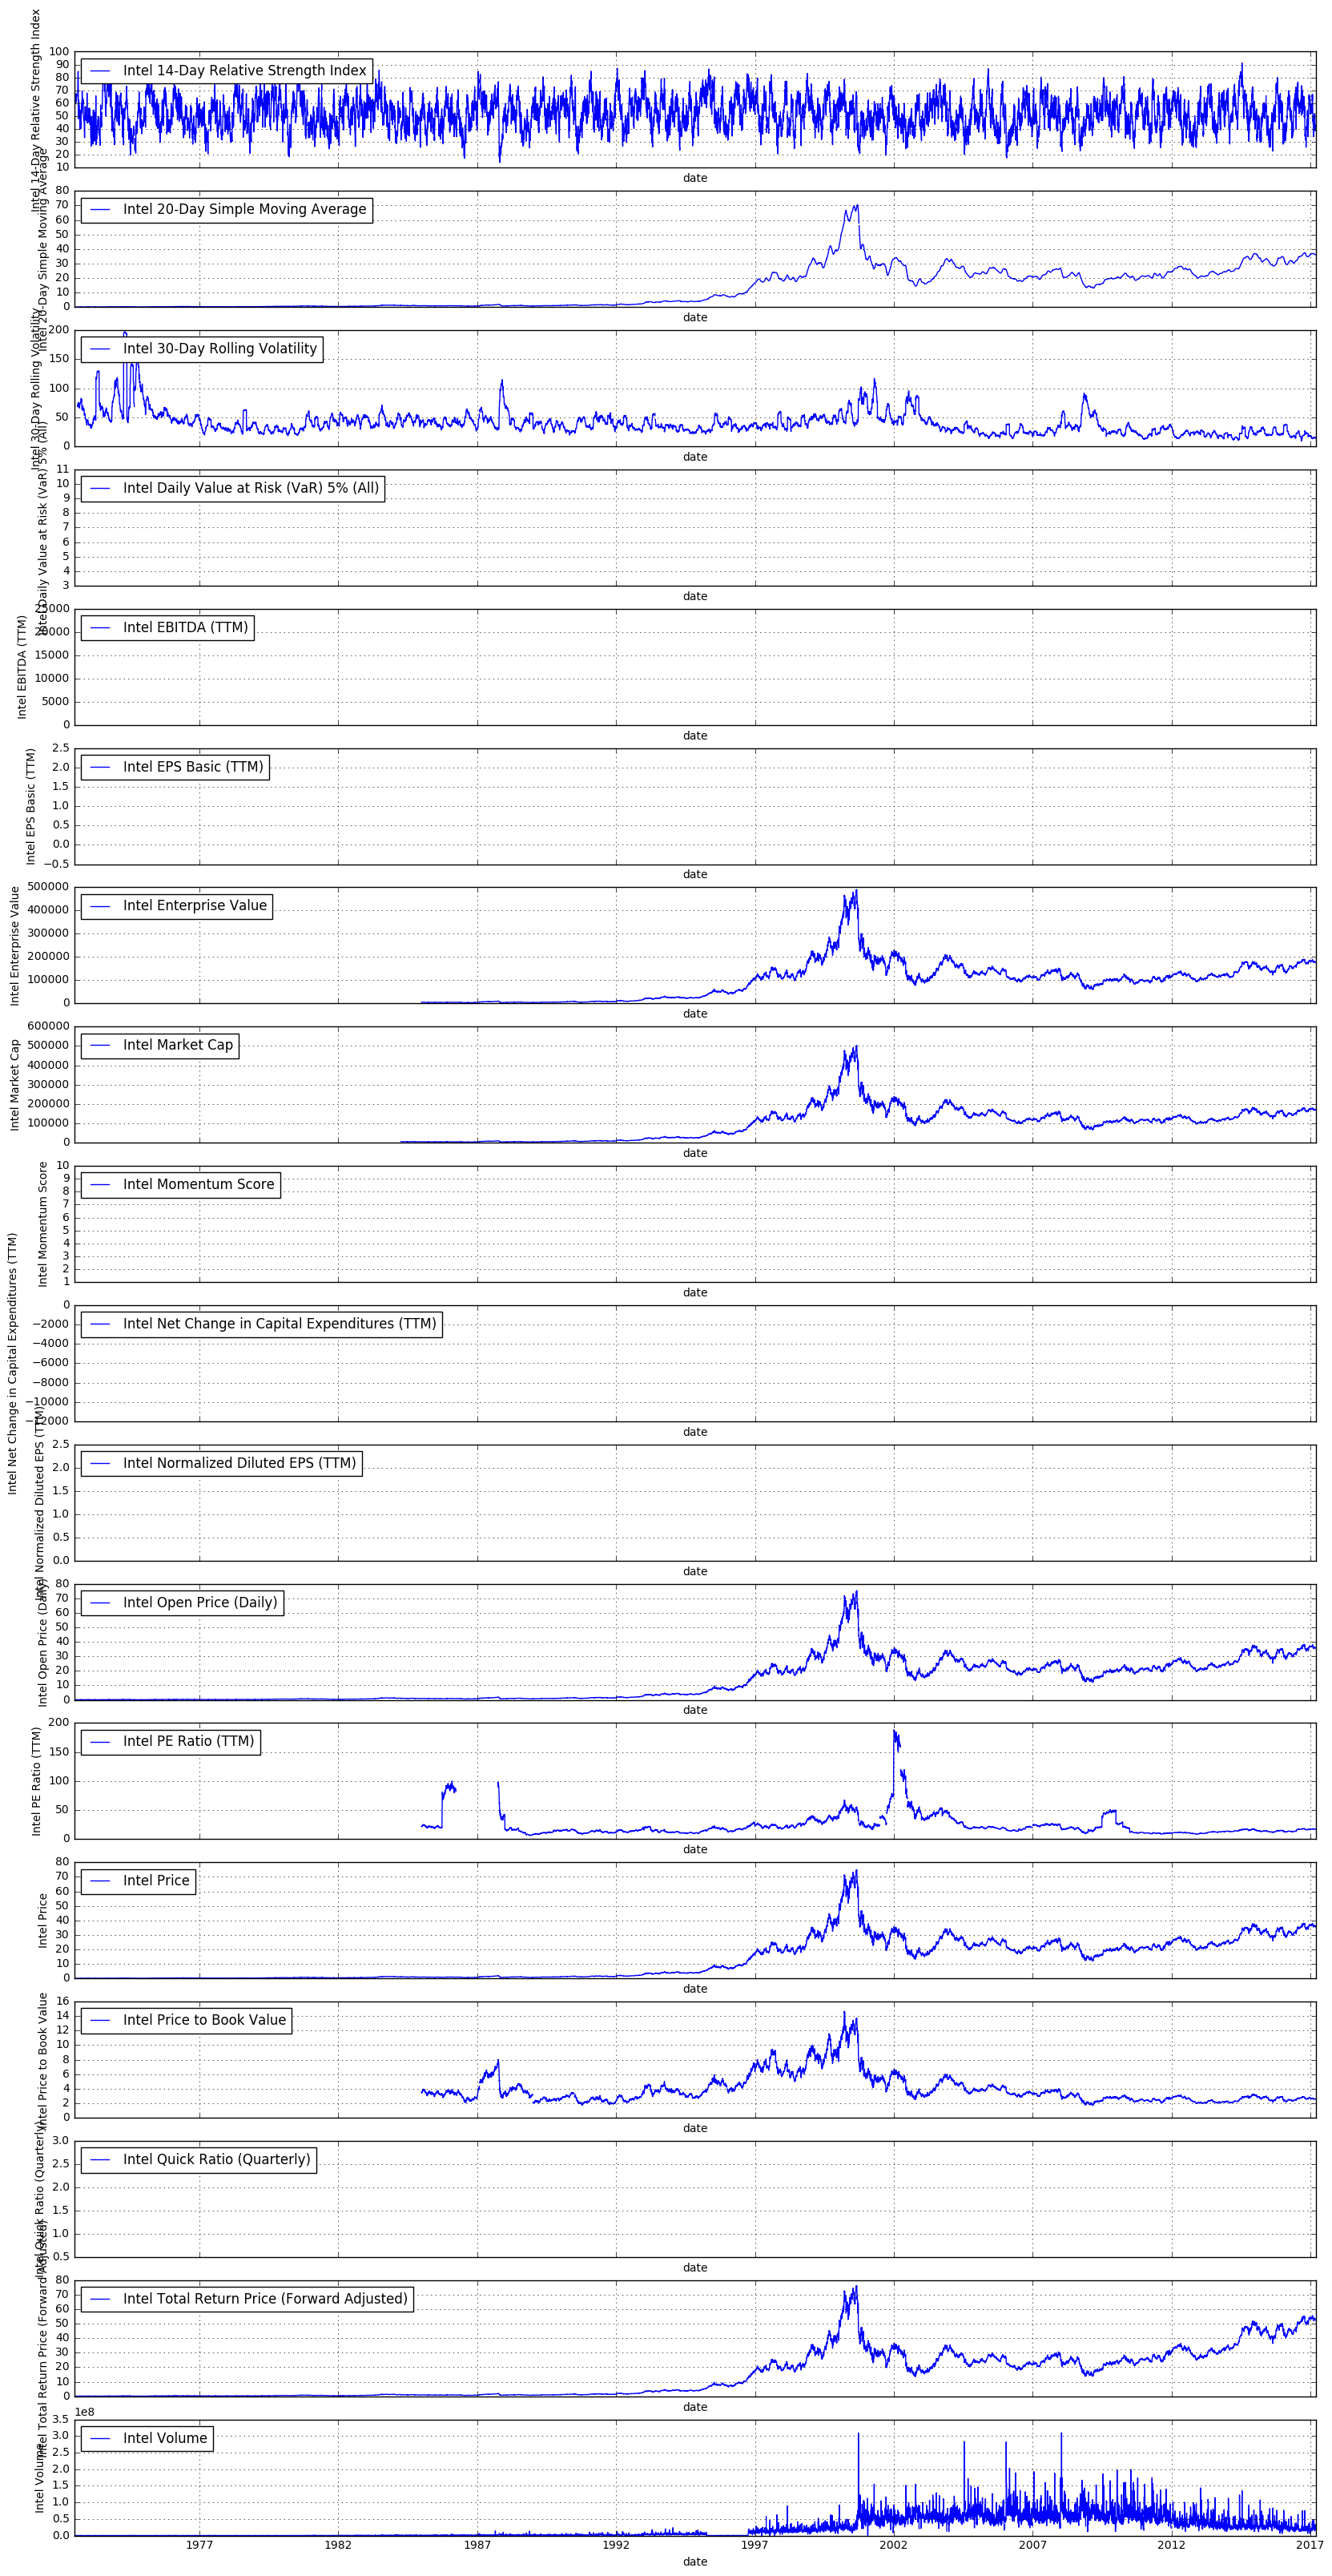

In [40]:
plt.rcParams['figure.figsize'] = (20.0, 40.0)
f, ax = plt.subplots(nrows=len(df_feature.columns),sharex=True) #

for i,colname in enumerate(df_feature.columns):
    ax[i].plot(df_feature[colname])
    ax[i].set_xlabel("date")
    ax[i].set_ylabel(colname)
    ax[i].grid(True)
    ax[i].legend(loc='upper left')
plt.show()

Decided to use only 1997-2007

## 1-2. Download daily SPY(S&P 500) data, Intel open,close,adj close value from Yahoo! Finance

In [43]:

#INPUT as global
symbols = ['INTC']
start_date = dt.datetime(1997,1,1)
end_date = dt.datetime(2017,3,9)

#download latest dataset with symbol from Yahoo Finance

def fetch_data(symbol,start_date,end_date):
    """ Downloads .csv files for <symbols> from Yahoo Finance and saves them in 'data' directory."""

    time_frame = "m" # d -> daily, w -> weekly, m -> monthly.
      
    start_date_mm=str(start_date.month-1)
    start_date_yyyy=str(start_date.year)
    start_date_dd=str(start_date.day)
    
    end_date_mm=str(end_date.month-1)
    end_date_yyyy=str(end_date.year)
    end_date_dd=str(end_date.day)

    url="http://real-chart.finance.yahoo.com/table.csv?s="+\
        symbol+\
        "&a="+start_date_mm+"&b="+start_date_dd+"&c="+start_date_yyyy+\
        "&d="+end_date_mm+"&e="+end_date_dd+"&f="+end_date_yyyy+\
        "&g="+time_frame+"+&ignore=.csv"

    csvfile,_=urllib.urlretrieve(url, './data/{}.csv'.format(symbol))
    print "Downloading for "+symbol
    print "URL:"+url
    statinfo = os.stat(csvfile)
    print 'File size:', statinfo.st_size/1000,"KB"

def run():
    #Download csv for symbols
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
       fetch_data(symbol,start_date,end_date)
    
run()

URL:http://real-chart.finance.yahoo.com/table.csv?s=SPY&a=0&b=1&c=1997&d=2&e=9&f=2017&g=m+&ignore=.csv
File size: 362 KB
URL:http://real-chart.finance.yahoo.com/table.csv?s=INTC&a=0&b=1&c=1997&d=2&e=9&f=2017&g=m+&ignore=.csv
File size: 310 KB


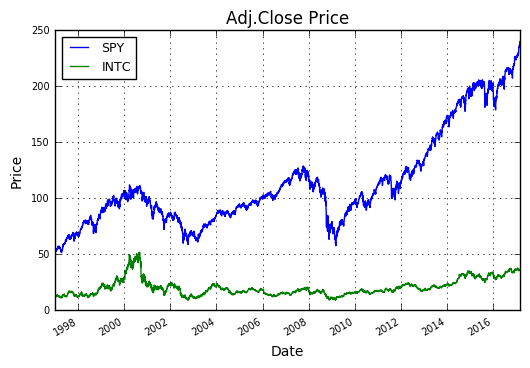

In [52]:
# Read data
dates = pd.date_range(start_date, end_date)
df_price = get_data(symbols, dates)
title="Adj.Close Price"; xlabel="Date"; ylabel="Price"
ax = df_price.plot(title=title, fontsize=7)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.grid(True)
ax.legend(loc="best", fontsize=9)
plt.show()

In [53]:
df_price.head(5)

,SPY,INTC
1997-01-02,51.810823,11.206980
1997-01-03,52.554415,11.894656
1997-01-06,52.095175,11.937636
1997-01-07,52.729378,12.324454
1997-01-08,52.270138,12.227750


In [54]:
df_price.tail(5)

,SPY,INTC
2017-03-02,238.270004,35.910000
2017-03-03,238.419998,35.900002
2017-03-06,237.710007,35.570000
2017-03-07,237.000000,35.799999
2017-03-08,236.559998,35.619999


In [73]:
df_merged=df_feature.join(df_price, how='inner')
print df_merged.shape,df_merged.columns
df_merged.head(2)

(5079, 20) Index([u'Intel 14-Day Relative Strength Index',
       u'Intel 20-Day Simple Moving Average',
       u'Intel 30-Day Rolling Volatility',
       u'Intel Daily Value at Risk (VaR) 5% (All)', u'Intel EBITDA (TTM)',
       u'Intel EPS Basic (TTM)', u'Intel Enterprise Value',
       u'Intel Market Cap', u'Intel Momentum Score',
       u'Intel Net Change in Capital Expenditures (TTM)',
       u'Intel Normalized Diluted EPS (TTM)', u'Intel Open Price (Daily)',
       u'Intel PE Ratio (TTM)', u'Intel Price', u'Intel Price to Book Value',
       u'Intel Quick Ratio (Quarterly)',
       u'Intel Total Return Price (Forward Adjusted)', u'Intel Volume', u'SPY',
       u'INTC'],
      dtype='object')


,Intel 14-Day Relative Strength Index,Intel 20-Day Simple Moving Average,Intel 30-Day Rolling Volatility,Intel Daily Value at Risk (VaR) 5% (All),Intel EBITDA (TTM),Intel EPS Basic (TTM),Intel Enterprise Value,Intel Market Cap,Intel Momentum Score,Intel Net Change in Capital Expenditures (TTM),Intel Normalized Diluted EPS (TTM),Intel Open Price (Daily),Intel PE Ratio (TTM),Intel Price,Intel Price to Book Value,Intel Quick Ratio (Quarterly),Intel Total Return Price (Forward Adjusted),Intel Volume,SPY,INTC
1997-01-02,51.3219,16.550000,38.7409,NaN,NaN,NaN,100247.875,107037.875,NaN,NaN,NaN,16.46875,22.0228,16.296875,6.3441,NaN,16.514187,12195300.0,51.810823,11.206980
1997-01-03,61.2696,16.605469,40.3435,NaN,NaN,NaN,106815.875,113605.875,NaN,NaN,NaN,16.62500,23.3742,17.296875,6.7334,NaN,17.527522,11948600.0,52.554415,11.894656


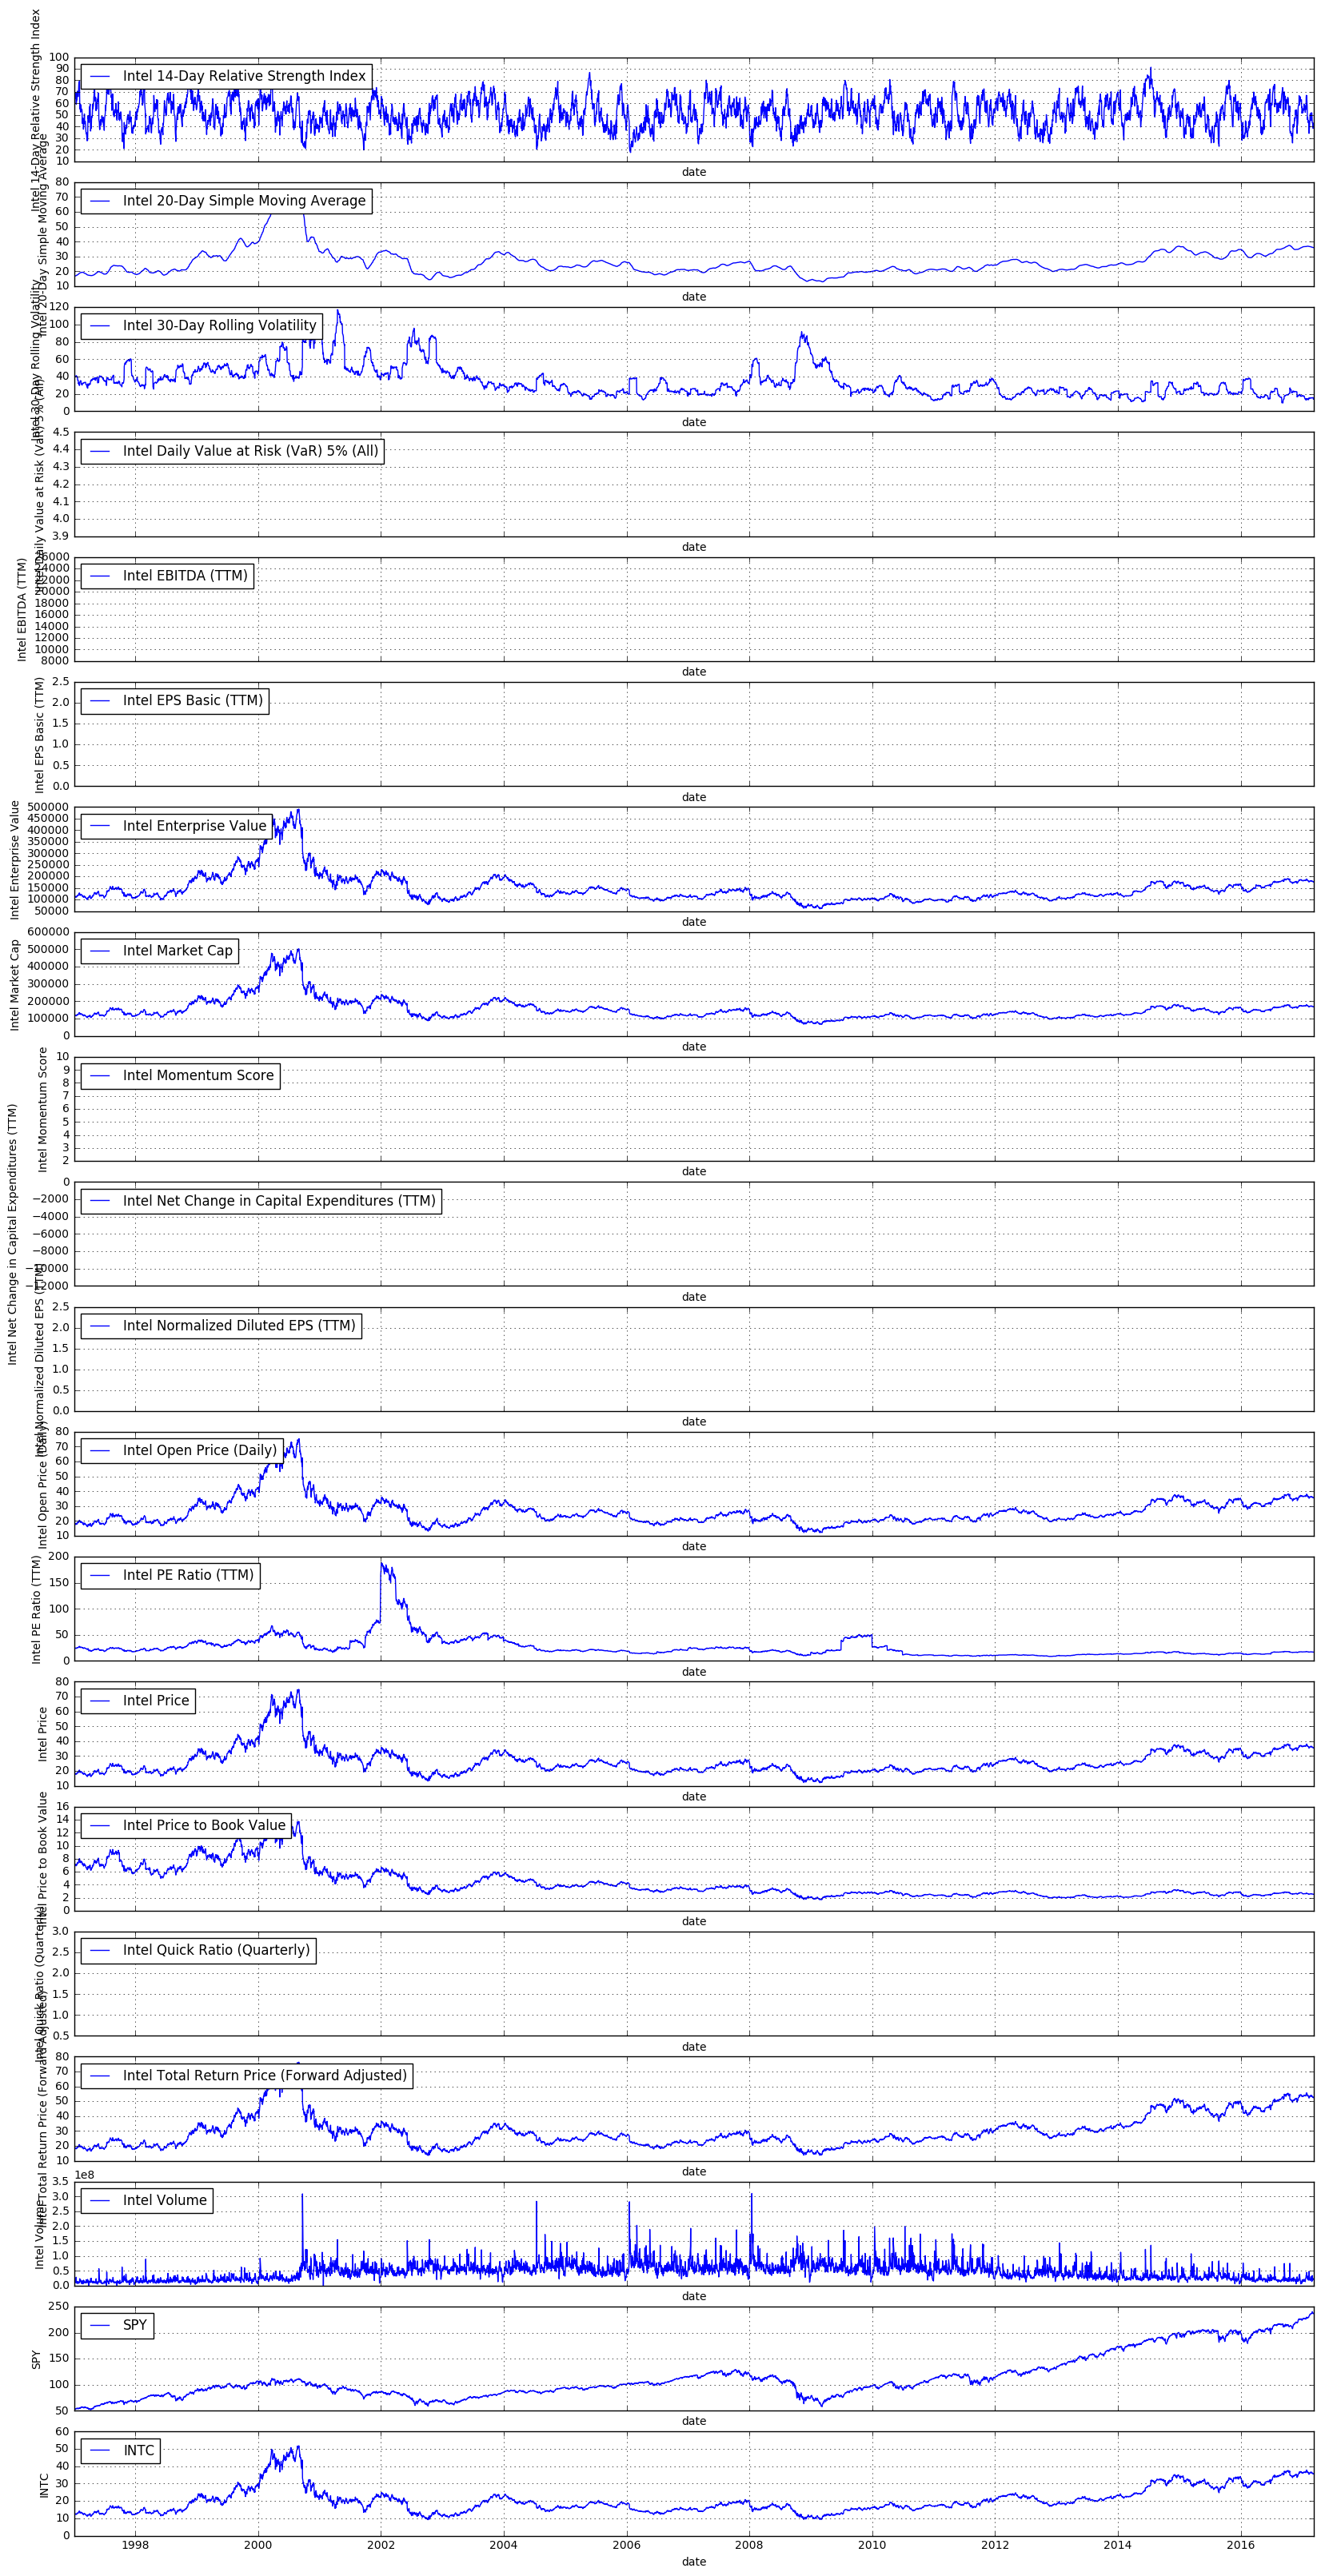

In [77]:
plt.rcParams['figure.figsize'] = (20.0, 40.0)
f, ax = plt.subplots(nrows=len(df_merged.columns),sharex=True) #

for i,colname in enumerate(df_merged.columns):
    ax[i].plot(df_merged[colname])
    ax[i].set_xlabel("date")
    ax[i].set_ylabel(colname)
    ax[i].grid(True)
    ax[i].legend(loc='upper left')
plt.show()

In [86]:
#Delete columns that has too many missing values.
todeliete=[]
for i,colname in enumerate(df_merged.columns):
    if 1.0*df_merged[colname].count()/len(df_merged[colname])<0.5:
        todeliete.append(colname)
        
print todeliete

for _, colname in enumerate(todeliete):
    del df_merged[colname]

print df_merged.columns

['Intel Daily Value at Risk (VaR) 5% (All)', 'Intel EBITDA (TTM)', 'Intel EPS Basic (TTM)', 'Intel Net Change in Capital Expenditures (TTM)', 'Intel Normalized Diluted EPS (TTM)', 'Intel Quick Ratio (Quarterly)']
Index([u'Intel 14-Day Relative Strength Index',
       u'Intel 20-Day Simple Moving Average',
       u'Intel 30-Day Rolling Volatility', u'Intel Enterprise Value',
       u'Intel Market Cap', u'Intel Open Price (Daily)',
       u'Intel PE Ratio (TTM)', u'Intel Price', u'Intel Price to Book Value',
       u'Intel Total Return Price (Forward Adjusted)', u'Intel Volume', u'SPY',
       u'INTC'],
      dtype='object')


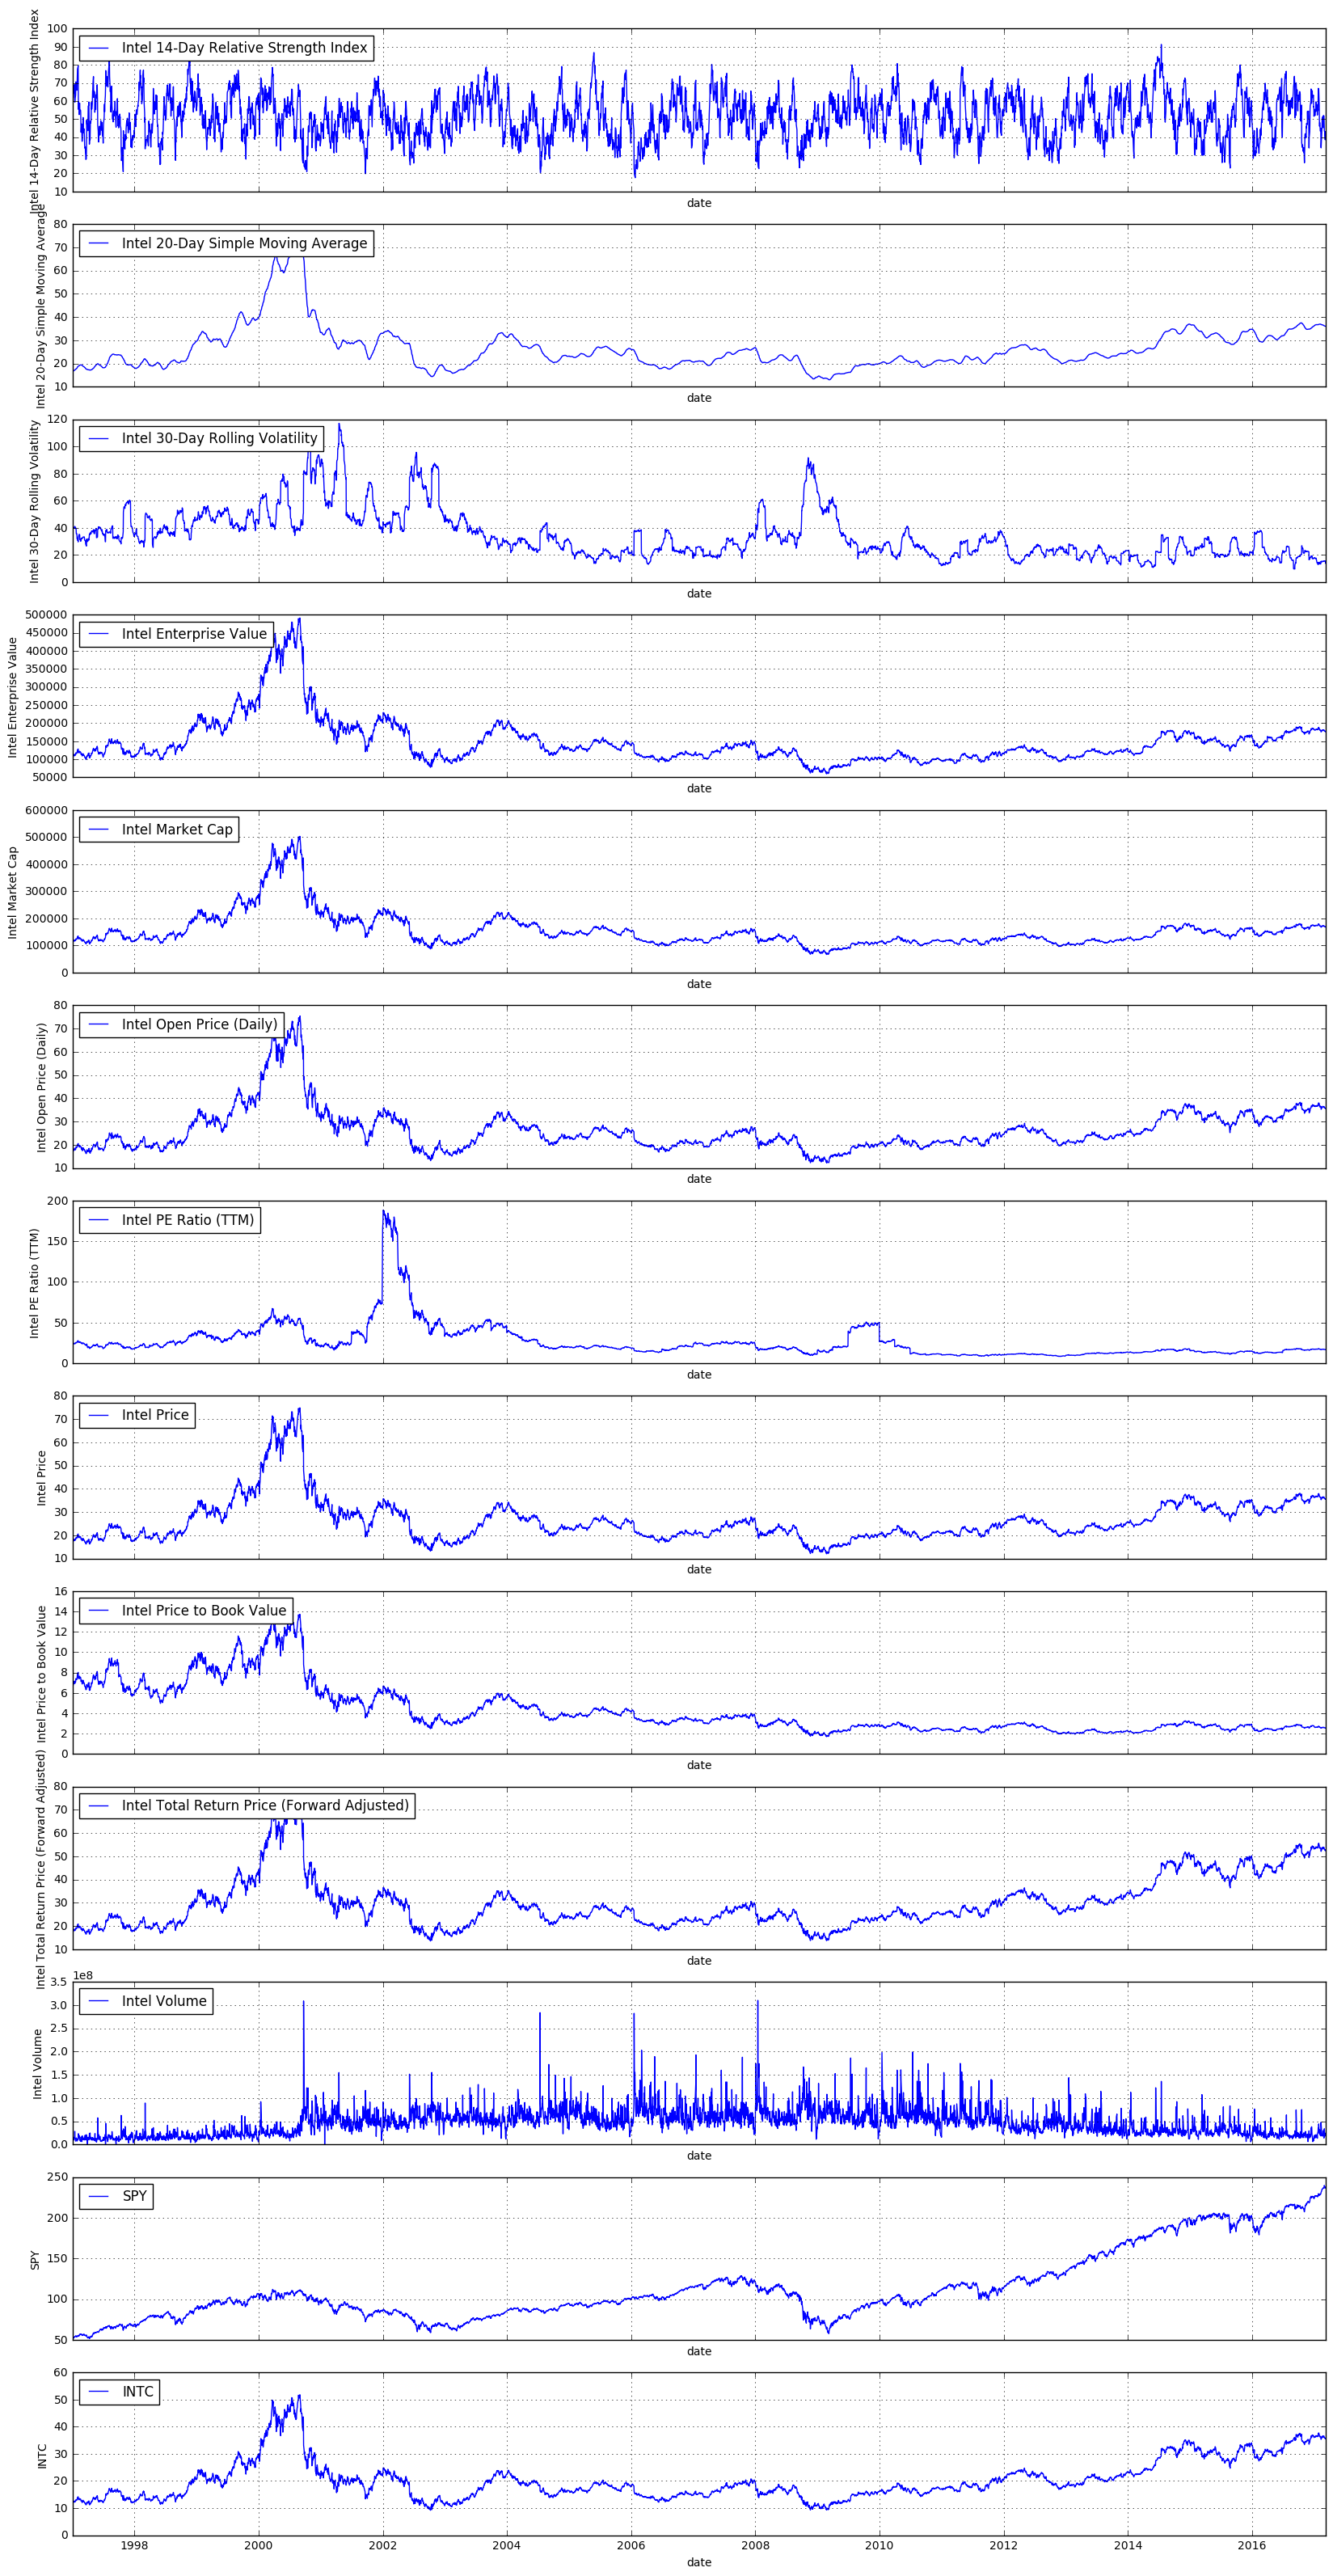

In [87]:
#Final dataset
plt.rcParams['figure.figsize'] = (20.0, 40.0)
f, ax = plt.subplots(nrows=len(df_merged.columns),sharex=True) #

for i,colname in enumerate(df_merged.columns):
    ax[i].plot(df_merged[colname])
    ax[i].set_xlabel("date")
    ax[i].set_ylabel(colname)
    ax[i].grid(True)
    ax[i].legend(loc='upper left')
plt.show()

In [88]:
#utils

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method="ffill", inplace=True)
    df_data.fillna(method="bfill", inplace=True)
    
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(symbol))

def get_data(symbols, dates):
    """Read adjusted close only for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path,parse_dates=True,index_col="Date", usecols=["Date", "Adj Close"],na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])
    return df_final

def normarlize_data(df):
    return df/df.ix[0,:]

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.ix[0]=0 
    return daily_returns

def plot_data(df_data,title="Stock Data",xlabel="Date",ylabel="Price"):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title=title, fontsize=7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend(loc="best", fontsize=4)
    plt.show()

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df_plot=df.ix[end_index:start_index,columns]
    df_plot=normarlize_data(df_plot)
    plot_data(df_plot, title='Selected Stock Prices')

def plot_normalized_data(df, title, xlabel, ylabel):
    #Normalize given stock prices and plot for comparison.
    #This is used to create a chart that illustrates the value of your portfolio over the year and compares it to SPY.
    #Note: Before plotting, portfolio and SPY values should be normalized to 1.0 at the beginning of the period.
    #Also, use the plot_data() utility function to generate and show your plot.
    df=normarlize_data(df)
    plot_data(df, title=title, ylabel="Normalized value")
   
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd 
    return upper_band, lower_band


In [89]:
df_merged = df_merged.dropna()
print df_merged.shape
print df_merged.columns

(5079, 13)
Index([u'Intel 14-Day Relative Strength Index',
       u'Intel 20-Day Simple Moving Average',
       u'Intel 30-Day Rolling Volatility', u'Intel Enterprise Value',
       u'Intel Market Cap', u'Intel Open Price (Daily)',
       u'Intel PE Ratio (TTM)', u'Intel Price', u'Intel Price to Book Value',
       u'Intel Total Return Price (Forward Adjusted)', u'Intel Volume', u'SPY',
       u'INTC'],
      dtype='object')


In [92]:
#Split training-testset 

y = df_merged['INTC']
X = pd.DataFrame([df_merged['Intel 14-Day Relative Strength Index'], 
                  df_merged['Intel 20-Day Simple Moving Average'],
                  df_merged['Intel 30-Day Rolling Volatility'], 
                  df_merged['Intel Enterprise Value'],
                  df_merged['Intel Market Cap'], 
                  df_merged['Intel Open Price (Daily)'],
                  df_merged['Intel PE Ratio (TTM)'], 
                  df_merged['Intel Price to Book Value'], 
                  df_merged['Intel Total Return Price (Forward Adjusted)'],
                  df_merged['Intel Volume']
                 ]).transpose()

tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  

for train_index, test_index in tscv.split(X):
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X[:len(train_index)], X[len(train_index):(len(train_index)+len(test_index))]

X_train.head(5)

TimeSeriesSplit(n_splits=3)


,Intel 14-Day Relative Strength Index,Intel 20-Day Simple Moving Average,Intel 30-Day Rolling Volatility,Intel Enterprise Value,Intel Market Cap,Intel Open Price (Daily),Intel PE Ratio (TTM),Intel Price to Book Value,Intel Total Return Price (Forward Adjusted),Intel Volume
1997-01-02,51.3219,16.550000,38.7409,100247.875,107037.875,16.468750,22.0228,6.3441,16.514187,12195300.0
1997-01-03,61.2696,16.605469,40.3435,106815.875,113605.875,16.625000,23.3742,6.7334,17.527522,11948600.0
1997-01-06,61.7951,16.671875,40.3292,107226.375,114016.375,17.390625,23.4586,6.7577,17.590855,15068700.0
1997-01-07,66.2354,16.782422,40.5571,110920.875,117710.875,17.320312,24.2188,6.9767,18.160856,12004000.0
1997-01-08,64.2257,16.858203,40.1123,109997.250,116787.250,18.000000,24.0287,6.9220,18.018356,15688800.0


In [161]:
#Baseline model, knn regressor

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
y_train_pred=neigh.predict(X_train)
y_test_pred=neigh.predict(X_test)
print "X_train, y_train,X_test, y_test",X_train.shape, y_train.shape,X_test.shape, y_test.shape
print "y_train_pred, y_test_pred", y_train_pred.shape, y_test_pred.shape

#Evaluation of regression
print "\n****Evaluation of regression****"
Rsqr=neigh.score(X_test,y_test)
RMSE=np.sqrt((np.sum((y_test_pred-y_test)**2))/len(y_test_pred))

#R square=(1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum()
print "coefficient of determination R^2 of the prediction in test set==",Rsqr
print "RMSE==",RMSE

X_train, y_train,X_test, y_test (3810, 10) (3810,) (1269, 10) (1269,)
y_train_pred, y_test_pred (3810,) (1269,)

****Evaluation of regression****
coefficient of determination R^2 of the prediction in test set== -2.91853953331
RMSE== 11.4618306446


In [122]:
print type(y_train), type(y_train_pred)

<class 'pandas.core.series.Series'> <type 'numpy.ndarray'>


In [129]:
##convert np array to df to plot together 
df_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
df_train_pred.head(2)

,y_train_pred
1997-01-02,13.447768
1997-01-03,12.329902


In [130]:
df_merged_trainPred=y_train.to_frame('INTC_price').join(df_train_pred)
df_merged_trainPred.head(2)

,INTC_price,y_train_pred
1997-01-02,11.206980,13.447768
1997-01-03,11.894656,12.329902


### Base model: knn regressor

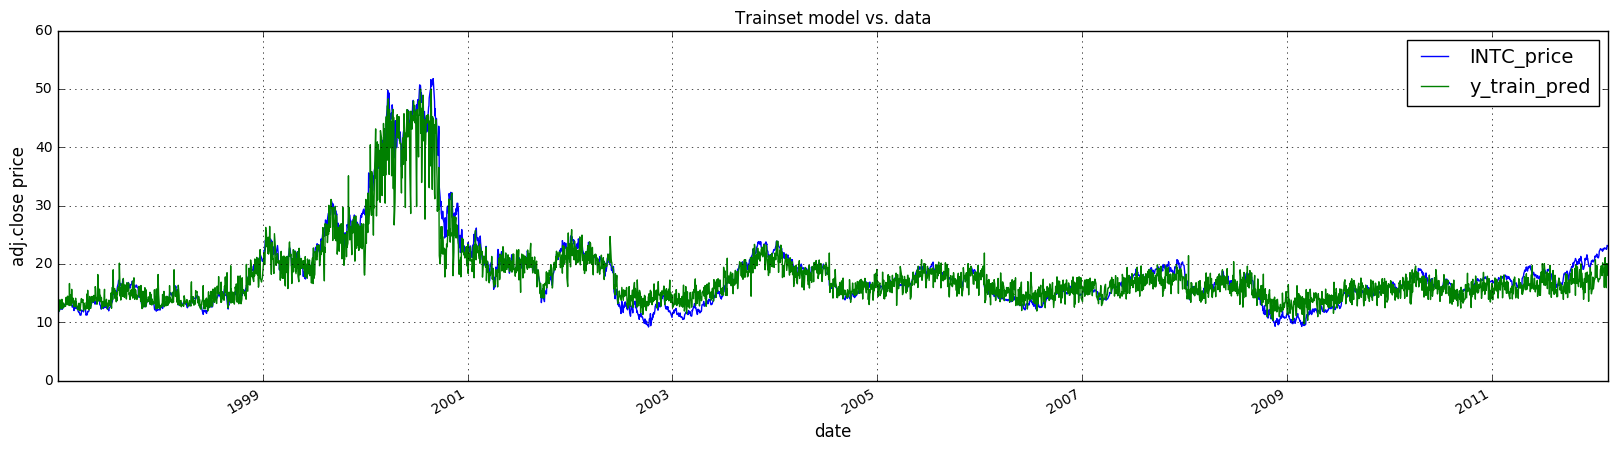

In [149]:
#Plot 
plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax1=df_merged_trainPred.plot()
ax1.set_xlabel('date',fontsize=12)
ax1.set_ylabel("adj.close price",fontsize=12)
ax1.set_title('Trainset model vs. data')
ax1.grid(True)
ax1.legend(loc="best", fontsize=14)

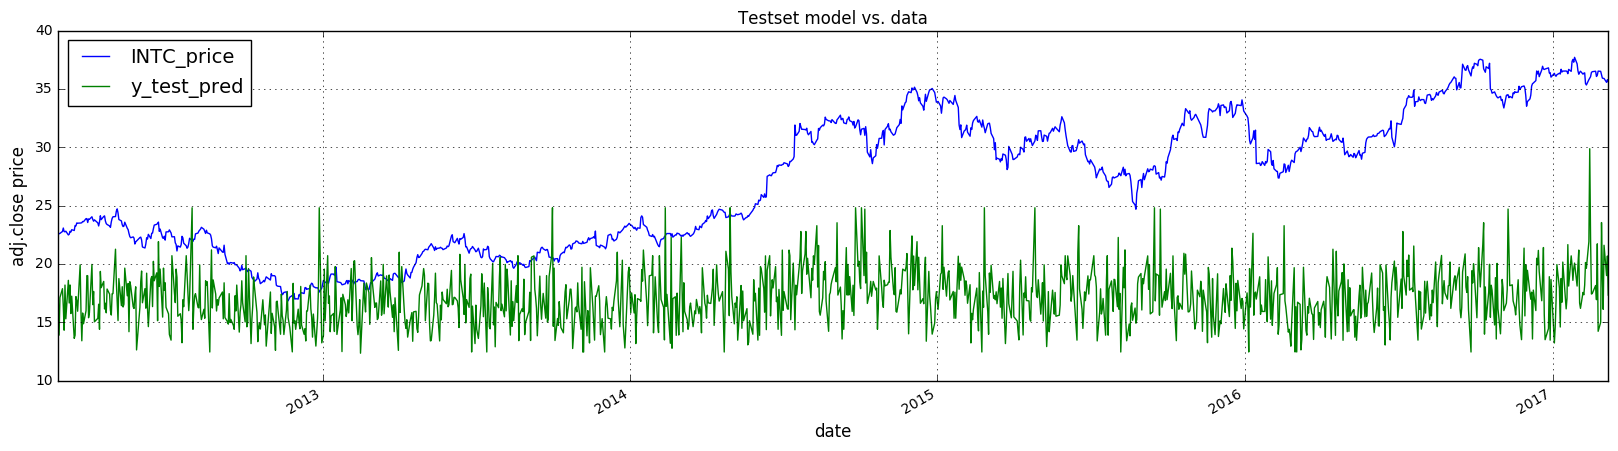

In [151]:
#Check testset data vs. prediction

df_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
df_test_pred.head(2)
df_merged_testPred=y_test.to_frame('INTC_price').join(df_test_pred)
df_merged_testPred.head(2)

ax2=df_merged_testPred.plot()
ax2.set_xlabel('date',fontsize=12)
ax2.set_ylabel("adj.close price",fontsize=12)
ax2.set_title('Testset model vs. data')
ax2.grid(True)
ax2.legend(loc="best", fontsize=14)

##### baseline knn shows poor performance. 


### RandomForest

X_train, y_train,X_test, y_test (3810, 10) (3810,) (1269, 10) (1269,)
y_train_pred, y_test_pred (3810,) (1269,)

****Evaluation of regression****
coefficient of determination R^2 of the prediction in test set== 0.607645031036
RMSE== 3.62686549243
Feature importance== [  5.42807375e-06   3.97583693e-05   1.09542744e-05   2.73812385e-01
   9.92710756e-02   5.80493912e-04   4.11774835e-05   2.25147061e-05
   6.26205482e-01   1.07304902e-05]


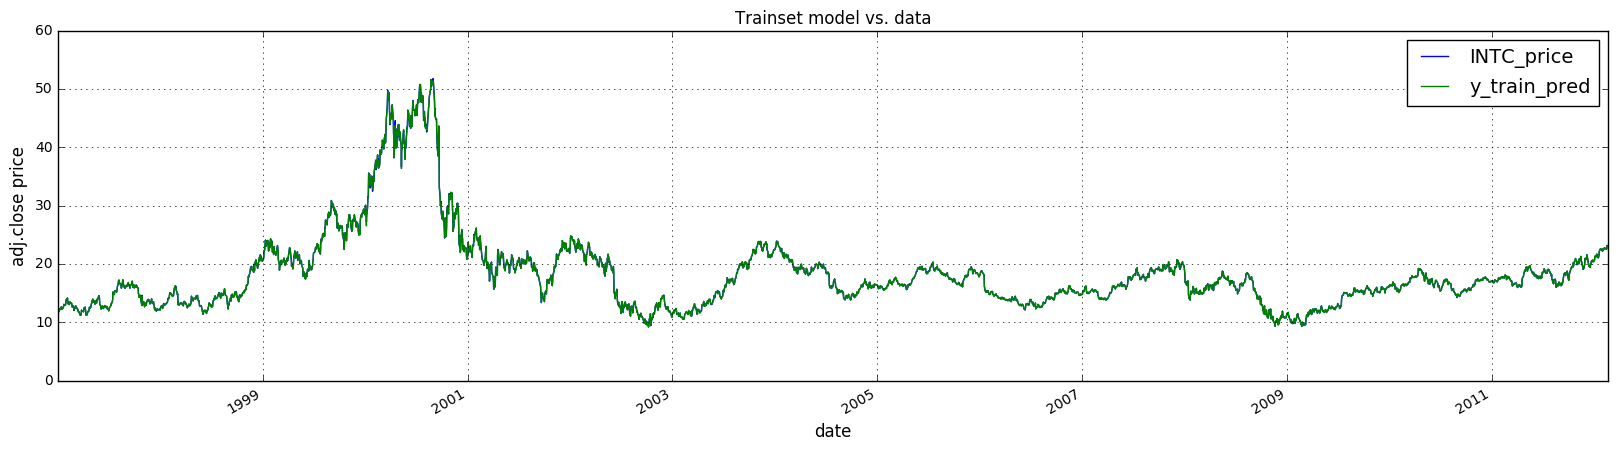

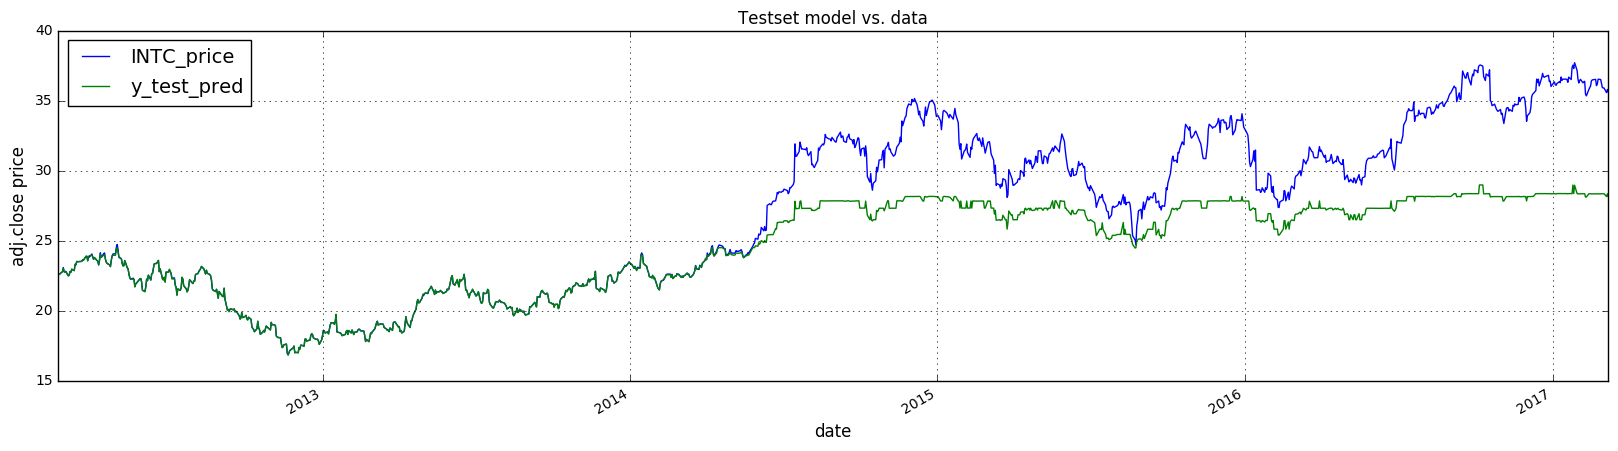

In [176]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
print "X_train, y_train,X_test, y_test",X_train.shape, y_train.shape,X_test.shape, y_test.shape
print "y_train_pred, y_test_pred", y_train_pred.shape, y_test_pred.shape

#Evaluation of regression
print "\n****Evaluation of regression****"
Rsqr=regressor.score(X_test,y_test)
RMSE=np.sqrt((np.sum((y_test_pred-y_test)**2))/len(y_test_pred))
feat_imprt=regressor.feature_importances_

#R square=(1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum()
print "coefficient of determination R^2 of the prediction in test set==",Rsqr
print "RMSE==",RMSE
print "Feature importance==", feat_imprt

##convert np array to df to plot together 
df_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
df_train_pred.head(2)

df_merged_trainPred=y_train.to_frame('INTC_price').join(df_train_pred)
df_merged_trainPred.head(2)

#Plot 

plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax1=df_merged_trainPred.plot()
ax1.set_xlabel('date',fontsize=12)
ax1.set_ylabel("adj.close price",fontsize=12)
ax1.set_title('Trainset model vs. data')
ax1.grid(True)
ax1.legend(loc="best", fontsize=14)

#Check testset data vs. prediction

df_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
df_test_pred.head(2)
df_merged_testPred=y_test.to_frame('INTC_price').join(df_test_pred)
df_merged_testPred.head(2)

ax2=df_merged_testPred.plot()
ax2.set_xlabel('date',fontsize=12)
ax2.set_ylabel("adj.close price",fontsize=12)
ax2.set_title('Testset model vs. data')
ax2.grid(True)
ax2.legend(loc="best", fontsize=14)

In [227]:
#feature importance in rank

features=np.array(X_train.columns)
featTable=np.vstack((features,feat_imprt))
featTable
ft=pd.DataFrame(featTable.T,columns=['features','values'])
ft.sort_values(by='values',ascending=False)

,features,values
8,Intel Total Return Price (Forward Adjusted),0.626205
3,Intel Enterprise Value,0.273812
4,Intel Market Cap,0.0992711
5,Intel Open Price (Daily),0.000580494
6,Intel PE Ratio (TTM),4.11775e-05
1,Intel 20-Day Simple Moving Average,3.97584e-05
7,Intel Price to Book Value,2.25147e-05
2,Intel 30-Day Rolling Volatility,1.09543e-05
9,Intel Volume,1.07305e-05
0,Intel 14-Day Relative Strength Index,5.42807e-06


### Adaboost with Decision tree

### Decision tree first 

X_train, y_train,X_test, y_test (3810, 10) (3810,) (1269, 10) (1269,)
y_train_pred, y_test_pred (3810,) (1269,)

****Evaluation of regression****
coefficient of determination R^2 of the prediction in test set== 0.957494483842
RMSE== 1.19375311557


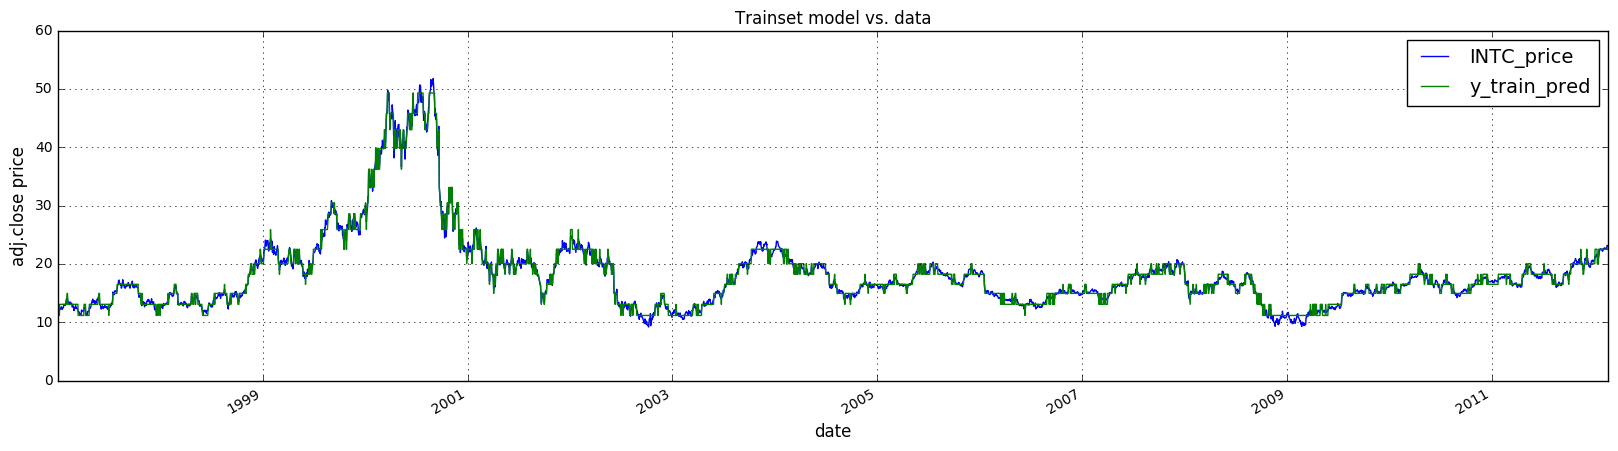

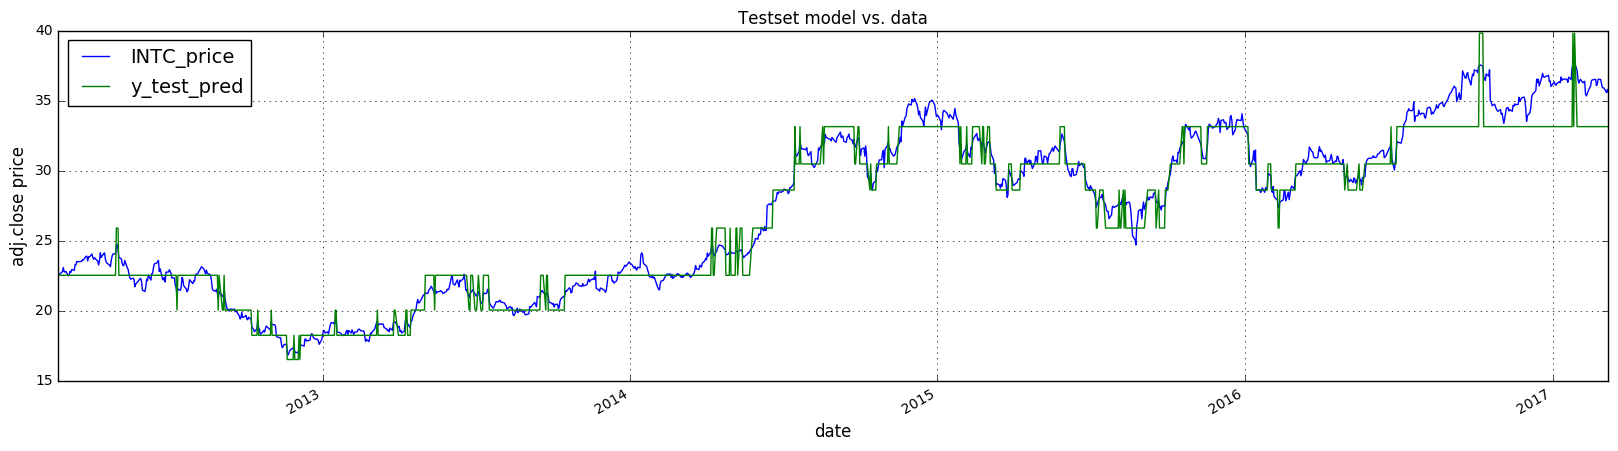

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
regressor= DecisionTreeRegressor(max_depth=4)

#Decision tree first

regressor.fit(X_train, y_train)
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
print "X_train, y_train,X_test, y_test",X_train.shape, y_train.shape,X_test.shape, y_test.shape
print "y_train_pred, y_test_pred", y_train_pred.shape, y_test_pred.shape

#Evaluation of regression
print "\n****Evaluation of regression****"
Rsqr=regressor.score(X_test,y_test)
RMSE=np.sqrt((np.sum((y_test_pred-y_test)**2))/len(y_test_pred))

#R square=(1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum()
print "coefficient of determination R^2 of the prediction in test set==",Rsqr
print "RMSE==",RMSE

##convert np array to df to plot together 
df_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
df_train_pred.head(2)

df_merged_trainPred=y_train.to_frame('INTC_price').join(df_train_pred)
df_merged_trainPred.head(2)

#Plot 

plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax1=df_merged_trainPred.plot()
ax1.set_xlabel('date',fontsize=12)
ax1.set_ylabel("adj.close price",fontsize=12)
ax1.set_title('Trainset model vs. data')
ax1.grid(True)
ax1.legend(loc="best", fontsize=14)

#Check testset data vs. prediction

df_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
df_test_pred.head(2)
df_merged_testPred=y_test.to_frame('INTC_price').join(df_test_pred)
df_merged_testPred.head(2)

ax2=df_merged_testPred.plot()
ax2.set_xlabel('date',fontsize=12)
ax2.set_ylabel("adj.close price",fontsize=12)
ax2.set_title('Testset model vs. data')
ax2.grid(True)
ax2.legend(loc="best", fontsize=14)

### AdaBoost

X_train, y_train,X_test, y_test (3810, 10) (3810,) (1269, 10) (1269,)
y_train_pred, y_test_pred (3810,) (1269,)

****Evaluation of regression****
coefficient of determination R^2 of the prediction in test set== 0.73003278825
RMSE== 3.00848175089


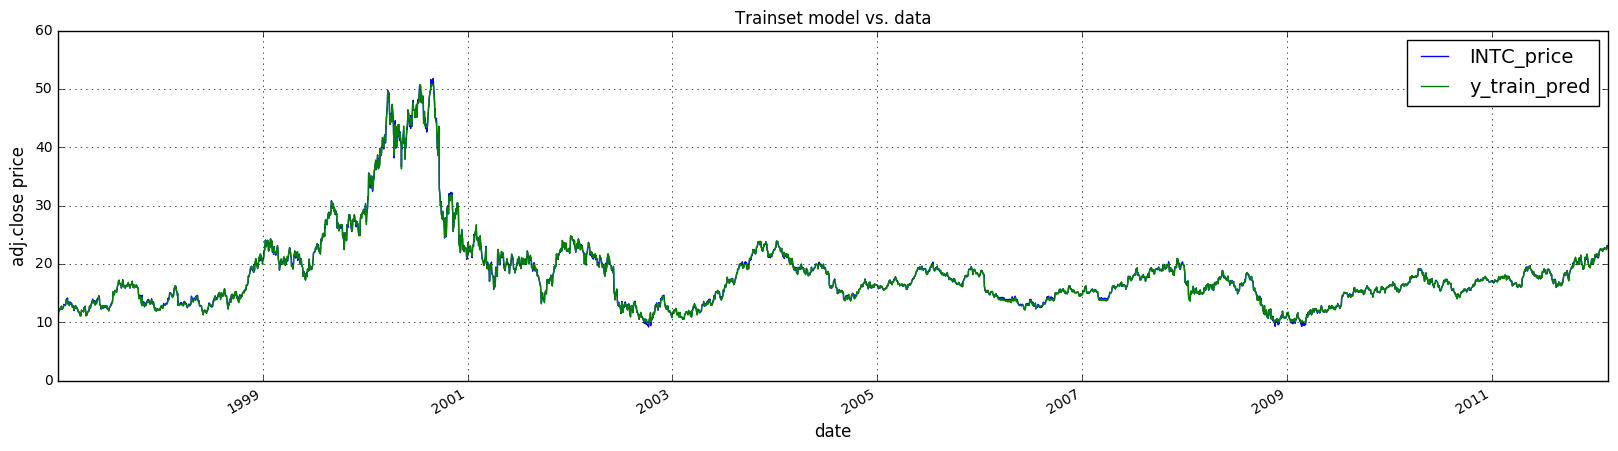

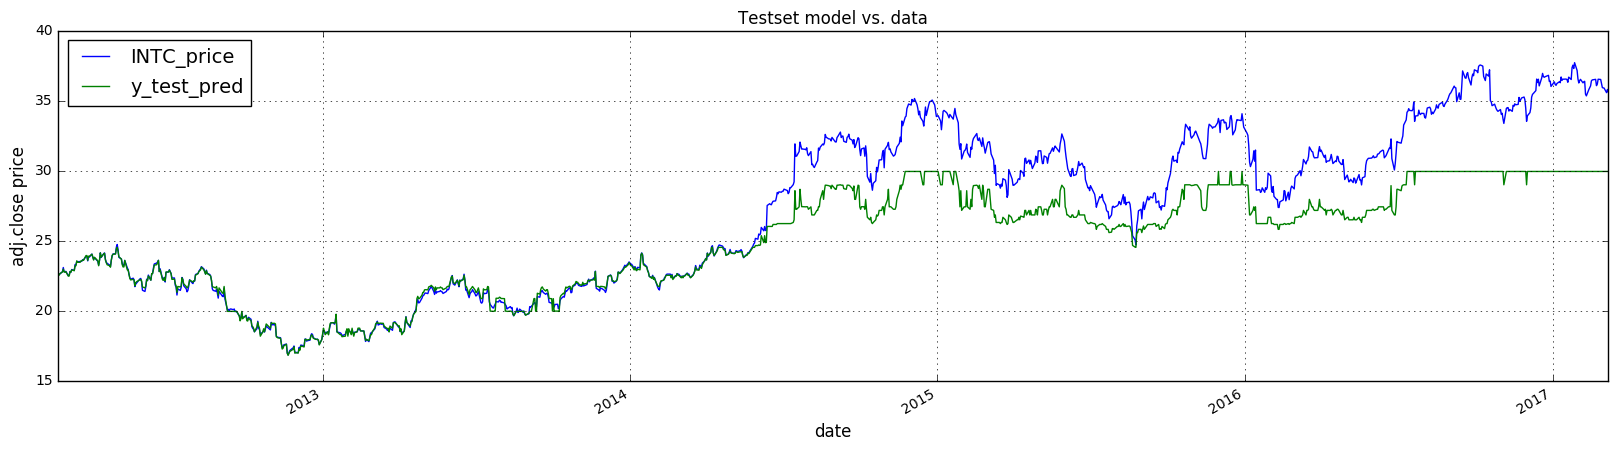

In [172]:
regressor_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)



regressor_2.fit(X_train, y_train)
y_train_pred=regressor_2.predict(X_train)
y_test_pred=regressor_2.predict(X_test)
print "X_train, y_train,X_test, y_test",X_train.shape, y_train.shape,X_test.shape, y_test.shape
print "y_train_pred, y_test_pred", y_train_pred.shape, y_test_pred.shape

#Evaluation of regression
print "\n****Evaluation of regression****"
Rsqr=regressor_2.score(X_test,y_test)
RMSE=np.sqrt((np.sum((y_test_pred-y_test)**2))/len(y_test_pred))

#R square=(1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum()
print "coefficient of determination R^2 of the prediction in test set==",Rsqr
print "RMSE==",RMSE

##convert np array to df to plot together 
df_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
df_train_pred.head(2)

df_merged_trainPred=y_train.to_frame('INTC_price').join(df_train_pred)
df_merged_trainPred.head(2)

#Plot 

plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax1=df_merged_trainPred.plot()
ax1.set_xlabel('date',fontsize=12)
ax1.set_ylabel("adj.close price",fontsize=12)
ax1.set_title('Trainset model vs. data')
ax1.grid(True)
ax1.legend(loc="best", fontsize=14)

#Check testset data vs. prediction

df_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
df_test_pred.head(2)
df_merged_testPred=y_test.to_frame('INTC_price').join(df_test_pred)
df_merged_testPred.head(2)

ax2=df_merged_testPred.plot()
ax2.set_xlabel('date',fontsize=12)
ax2.set_ylabel("adj.close price",fontsize=12)
ax2.set_title('Testset model vs. data')
ax2.grid(True)
ax2.legend(loc="best", fontsize=14)

### SVM

X_train, y_train,X_test, y_test (3810, 10) (3810,) (1269, 10) (1269,)
y_train_pred, y_test_pred (3810,) (1269,)

****Evaluation of regression****
coefficient of determination R^2 of the prediction in test set== -3.13854709558
RMSE== 11.7792007049


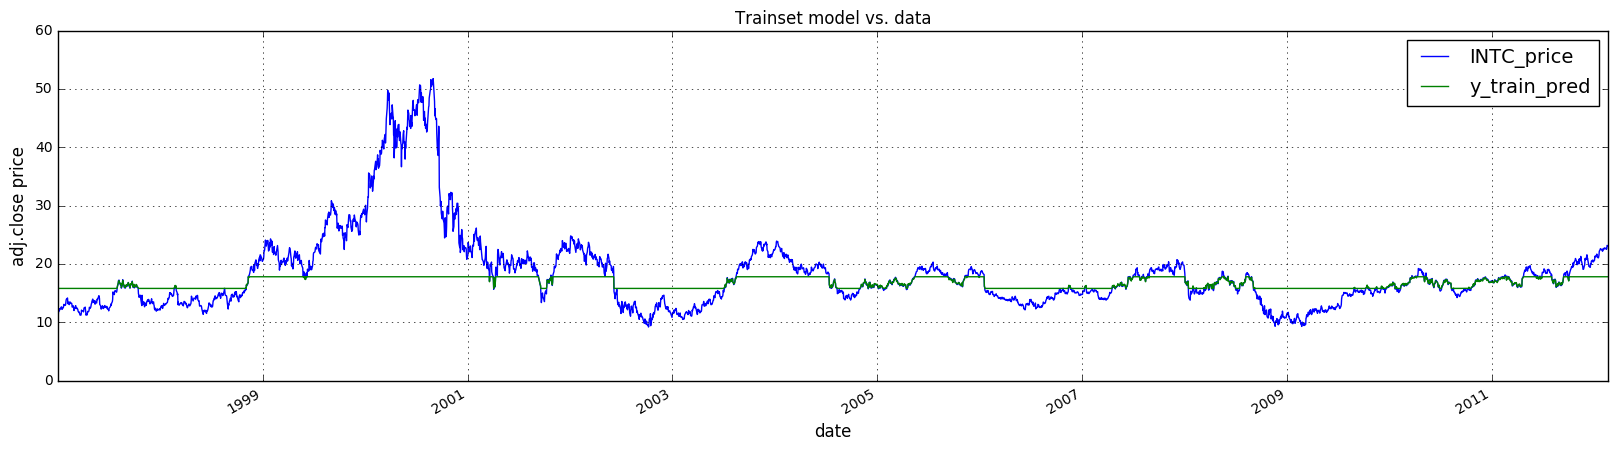

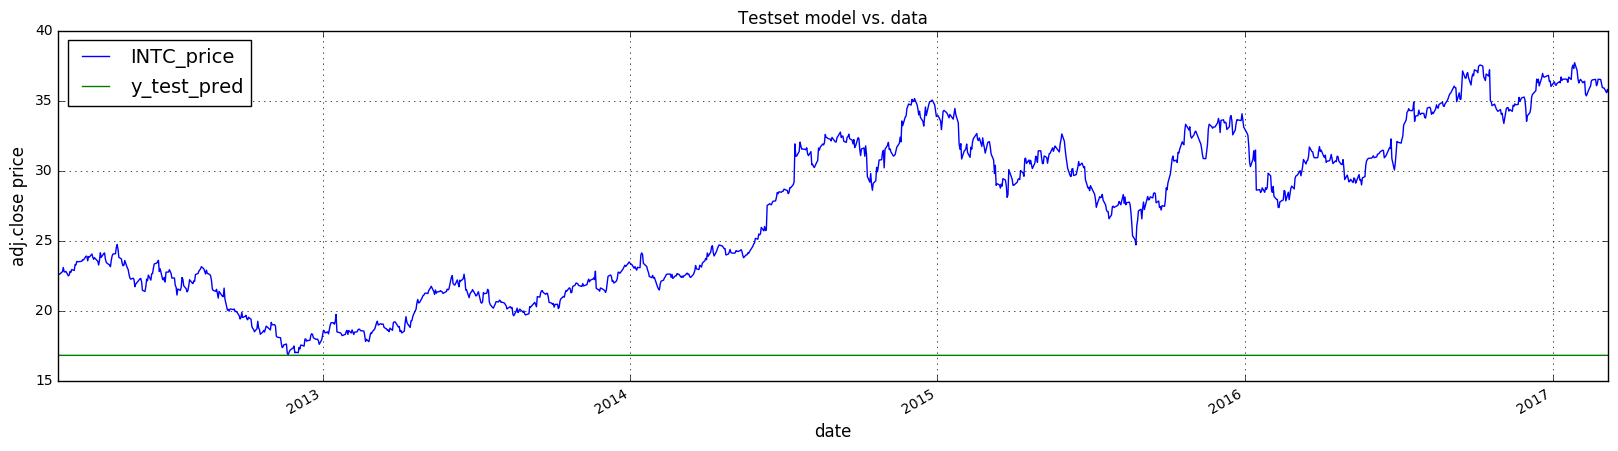

In [174]:
from sklearn.svm import SVR

np.random.seed(0)
regressor= SVR()#C=1.0, epsilon=0.2

#Decision tree first
regressor.fit(X_train, y_train)
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
print "X_train, y_train,X_test, y_test",X_train.shape, y_train.shape,X_test.shape, y_test.shape
print "y_train_pred, y_test_pred", y_train_pred.shape, y_test_pred.shape

#Evaluation of regression
print "\n****Evaluation of regression****"
Rsqr=regressor.score(X_test,y_test)
RMSE=np.sqrt((np.sum((y_test_pred-y_test)**2))/len(y_test_pred))

#R square=(1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum()
print "coefficient of determination R^2 of the prediction in test set==",Rsqr
print "RMSE==",RMSE

##convert np array to df to plot together 
df_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
df_train_pred.head(2)

df_merged_trainPred=y_train.to_frame('INTC_price').join(df_train_pred)
df_merged_trainPred.head(2)

#Plot 

plt.rcParams['figure.figsize'] = (20.0, 5.0)
ax1=df_merged_trainPred.plot()
ax1.set_xlabel('date',fontsize=12)
ax1.set_ylabel("adj.close price",fontsize=12)
ax1.set_title('Trainset model vs. data')
ax1.grid(True)
ax1.legend(loc="best", fontsize=14)

#Check testset data vs. prediction

df_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
df_test_pred.head(2)
df_merged_testPred=y_test.to_frame('INTC_price').join(df_test_pred)
df_merged_testPred.head(2)

ax2=df_merged_testPred.plot()
ax2.set_xlabel('date',fontsize=12)
ax2.set_ylabel("adj.close price",fontsize=12)
ax2.set_title('Testset model vs. data')
ax2.grid(True)
ax2.legend(loc="best", fontsize=14)